# <stan style="color:orange">Distribución espacial de las fibras y cálculo de sus distancias al electrodo </stan>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pandas as pd
from scipy.interpolate import interp1d
import random

## <span style="color: cyan"> Señal de entrada</stan>


Esto no es parte del modelo. Es una forma de generar la entrada al modelo. Esta es una forma medio pobre, voy a tener que buscarle una forma mejor. 

In [2]:
fs = 20000
#t1 = np.linspace(1/fs, 0.4, 8000)
t1=np.arange(1/fs,0.4+1/fs,1/fs)
fc = 2000
orden = 2
b, a = signal.butter(orden, fc/(fs/2))
x = np.zeros_like(t1)
x[3999] = 1
Vm = signal.lfilter(b, a, x)
Vm = Vm / np.max(Vm)
#plt.plot(t1, Vm)
#print(type(Vm))
#print(t1,type(t1),len(t1))

## <stan style="color: cyan"> Modelado del nervio y sus fibras </stan>

AGREGAR:
* Mejorar la distribución con coordenadas polares
* Permitir hacer otro tipo de distribución que no sea la uniforme
* Permitir ingresar manualmente la distribución de las fibras
* Ver qué onda con el espacio finito de las fibras (que no se sobrepongan una sobre otra) (ver si tiene sentido)
* Que el electrodo no sea un punto sino que tenga un tamaño, así la distancia de la fibra al electrodo sea la mínima distancia

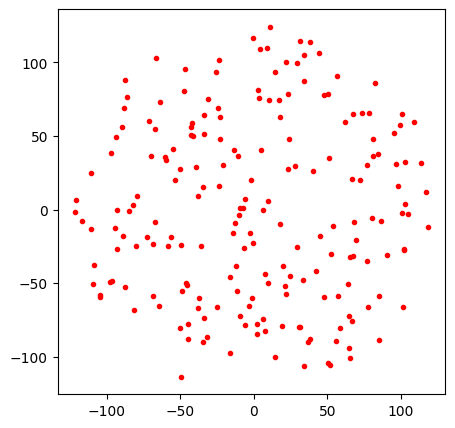

In [27]:
#Distribución uniforme


nu = 200 # cantidad de fibras
diametro = 250 #diametro del nervio
radio = diametro/2

fibras = np.zeros((nu,2))
np.random.seed(123)
#Distribución uniforme
for i,num in enumerate(fibras):
    length = np.random.uniform(0,radio**2)
    angle = np.pi * np.random.uniform(0, 2)
    x = np.sqrt(length) * np.cos(angle)
    y = np.sqrt(length) * np.sin(angle)
    fibras[i] = [x,y]

#print(fibras)

plt.figure(figsize = (5,5))
plt.plot(fibras[:,0],fibras[:,1],"r .")

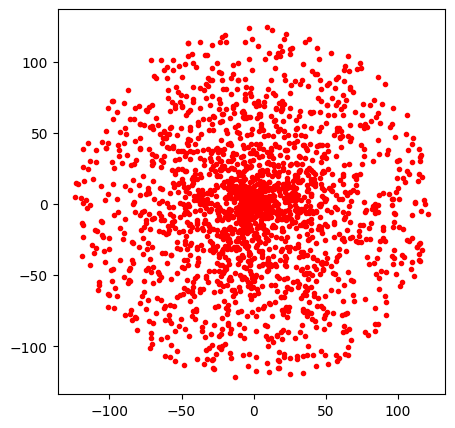

In [7]:
#Distribución Normal (De 0 a pi)

nu = 2000 # cantidad de fibras
diametro = 250 #diametro del nervio
radio = diametro/2

fibras = np.zeros((nu,2))


for i,num in enumerate(fibras):
    length = np.random.normal(0,radio)
    angle = np.pi * np.random.uniform(0, 1)
    #print(length,angle)
    while np.abs(length) > radio:
        length = np.random.normal(0,radio)
    #print("x", length, angle)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    fibras[i] = [x,y]

#print(fibras, len(fibras))


plt.figure(figsize = (5,5))
plt.plot(fibras[:,0],fibras[:,1],"r .")

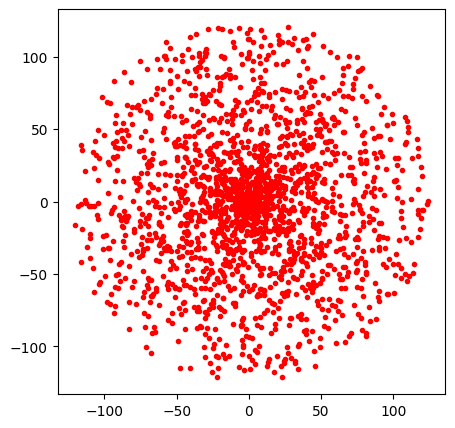

In [8]:
#Distribución Normal (De 0 a 2pi)

nu = 2000 # cantidad de fibras
diametro = 250 #diametro del nervio
radio = diametro/2

fibras = np.zeros((nu,2))

for i,num in enumerate(fibras):
    length = np.random.normal(0,radio)
    angle = np.pi * np.random.uniform(0, 2)
    while np.abs(length) > radio:
        length = np.random.normal(0,radio)
    x = length * np.cos(angle)
    y = length * np.sin(angle)
    # TODO así se carga fibra a fibra --> self.lista_fibras.append(Fibra(x,y))
    fibras[i] = [x,y]

plt.figure(figsize = (5,5))
plt.plot(fibras[:,0],fibras[:,1],"r .")

In [21]:
#Ingreso manual de unicación de fibras

fibras = pd.read_csv("fibras.csv")

numero_fibras = len(fibras)

for i in range(0,numero_fibras):
    x = fibras["x"][i]
    y = fibras["y"][i]
    #self.lista_fibras.append(Fibra(x,y))


In [ ]:
# Calculo de distancia de cada fibra electrodo --------------------------------
dist = []
electrodo = [0,a] #ubicacion del electrodo
for item in puntitos:
    #dist.append(np.sqrt((item[0])**2 + (np.abs(a) + item[1])**2))
    dist.append(np.linalg.norm(item-electrodo))

dist = np.array(dist)

#print(dist,len(dist),type(dist))

#! Ver de cambiar la forma en la que creo dist y los puntos, así no sean primero listas


In [ ]:
# Más parámetros del modelo

nn = 2 #numero de nodos
den = 1000 #distancia entre nodos
dx = 12000 #distancia en micras al primer electrodo
dx1 = 16000 #distancia en micras al segundo electrodo

In [16]:
#Prueba de distancia de un punto a una línea
punto1 = np.array([0,4])
punto2 = np.array([6,4])
punto3 = np.array([50,1])
d = np.linalg.norm(np.cross(punto2-punto1, punto1-punto3))/np.linalg.norm(punto2-punto1)
print(d)

3.0


In [12]:
print(d)

4.0


In [24]:
import numpy as np
from numpy.linalg import norm

A = np.array([0,4])
B = np.array([6,4])
P = np.array([10,0])

if np.arccos(np.dot((P-A)/norm(P-A), (B-A)/norm(B-A))) > np.pi/2:
    d = norm(P-A)
elif np.arccos(np.dot((P-B)/norm(P-B), (A-B)/norm(A-B))) > np.pi/2:
    d = norm(P-B)
else:
    d = norm(np.cross(B-A, A-P))/norm(B-A)

print(d)

5.656854249492381


## <stan style="color: cyan"> Copia de la entrada para cada fibra del nervio</stan>

In [ ]:
resp = [] #lo comienzo como una lista
for i in range(0,nu): #punto de mejora de entradas, aqui digo que es el mismo
    resp.append(Vm) 

#! Ver donde corcho vuelvo a usar esto porque ni idea

## <stan style="color:cyan "> Cálculo del factor mínimo de atenuación (Wmax) </stan>

In [ ]:
Wmax = np.zeros_like(dist)
for i,distancia in enumerate(dist):
    if (1-(distancia/40))<0:
        Wmax[i]=0.01
    else:
        Wmax[i]=1-(distancia/40)

#print(Wmax,len(Wmax),type(Wmax))

In [22]:
range(5)

range(0, 5)

## <stan style="color:cyan">Función para calcular el factor de ponderación (pesosW en Matlab) </stan>

In [ ]:
d=nn*den
dx=500

x=np.array(list(range(0,200000,50))) #con 200mil hay 4mil datos
ww = np.zeros(len(x)) #tamaño 1x4mil
sizeW = (len(Wmax),len(x))
W = np.zeros(sizeW) #debería ser [1x4mil ...1x4mil] de tamaño Wmax(que es 200)

for i,v in enumerate(Wmax):
    for idx,num in enumerate(x):
        if num<dx:
            m = (num/d)-(dx/d)+v
        else:
            m = (-num/d)+(dx/d)+v
        if m<0:
            m = 0
        W[i,idx]=m

#print(W)

#df = pd.DataFrame(W).T
#df.to_excel(excel_writer ="C:/Users/aguir/Desktop/Prroyecto/test.xlsx")       

## <stan style="color:cyan">Cálculo de las velocidades de conducción nerviosa </stan>

Se realiza la asignación de diámetros. Promedio 5.5 micras y desviación estándar de 1.5 micras.
Las velocidades de conducción tienen una relación lineal con el diámetro de las fibras, y puede ser estimado multiplicandola por 7.6. <span style="color: red;">Buscar bien por qué usan ese número.</span>

In [ ]:
mu, sigma = 5.5 , 1.5
diametros = np.random.normal(mu,sigma,nu) #array con diámetros
#print(diametros,type(diametros),len(diametros))

In [ ]:
#Gráfica del histograma de diámetros

#plt.hist(diametros,20)
#plt.show()


In [ ]:
vel = np.zeros(len(diametros))
for d,n in enumerate(diametros):
    vel[d]=n*7.6

## <stan style="color:cyan">Función Cálculo del single fiber action potential (sum_SFAP en Matlab) </stan>

Desde aquí abajo comienza la función

In [ ]:
N = len(W) #cantidad de fibras del nervio
x=np.array(list(range(0,200000,50))) #vector con resolución de 50 micras, igual que en pesosW()

#Ver que estos valores, si yo los cambié arriba o que onda
dx = 12000
den = 1000

#Para conseguir dd
#TODO ver si se lo puede hacer más corto
dd1 = np.arange(nn,0,-1)
dd2 = np.arange(0,nn)
for i,n in enumerate(dd1):
    dd1[i]=dx-(n*den)
for i,n in enumerate(dd2):
    dd2[i]=dx+n*den
dd = np.concatenate((dd1,dd2), axis=0)
print(dd)

fss = 100000 #subfrecuencia de muestreo (para implementar retardos)

t11=np.arange(1/fss,t1[-1]+1/fss,1/fss) #vector de tiempo remuestrado usando fss
resp_pos = np.zeros((N,len(t11))) #inicialización de la matriz respuesta


Aquí sigue con el ciclo for 

In [ ]:
# CICLO FOR HORRIBLE ---------------------------------------------


#! Primero vuelvo a resp un array, ver de cambiarlo arriba
resp = np.array(resp)

for i in range(0,N):
    f = interp1d(t1,resp[i],fill_value="extrapolate")
    RESP = f(t11)
    xx = np.array([i for (i,val) in enumerate(W[i]) if val!= 0])
    d = x[xx[0]]
    reti = np.round(((d/1000)/(vel[i]*1000))*fss)
    ret = 0
    S = np.zeros((len(dd),len(t11)))
    #Comienza el segundo for :O 
    for j in range(len(dd)-1):
        f1 = interp1d(x,W[i],fill_value="extrapolate")
        aux2 = f1(dd[j])
        aux = RESP*dd[j]
        S[j][int(reti+ret+1):len(aux)] = aux[1:(len(aux)-int(ret+reti))]
        ret=np.round((den/1000)/(vel[i]*1000)*fss)+ret
    resp_pos[i]= sum(S)
sum_SFAP1 = sum(resp_pos)


        

In [ ]:
class Nervio():
    def __init__(self) -> None:
        pass
    def llename(self):
        

class Fibra():
